In [1]:
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import linregress


In [2]:
def to_timestamp(date):
    return date.timestamp()

In [3]:
dogRatesTweets = pd.read_csv("./dog_rates_tweets.csv", index_col=0)
dogRatesTweets['created_at'] = pd.to_datetime(dogRatesTweets['created_at'],format="mixed",utc=True)

In [4]:
pattern = r'(\d+(\.\d+)?)/10'
rating = dogRatesTweets['text'].str.contains(pattern,regex=True)
dogRatesTweets_filt = dogRatesTweets[rating]
del dogRatesTweets
rating = dogRatesTweets_filt['text'].str.extract(pattern)[0].astype(float)
dogRatesTweets_filt.insert(2,"rating",rating,True) ##1675 here
dogRatesTweets_filt = dogRatesTweets_filt[dogRatesTweets_filt["rating"] < 20]
dogRatesTweets_filt ##1669 here


/var/folders/fg/885k04tx1c19vmlhfrbl5mc80000gn/T/ipykernel_61504/1761417457.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  rating = dogRatesTweets['text'].str.contains(pattern,regex=True)


,created_at,text,rating
id,,,
994363623421153280,2018-05-09 23:48:56+00:00,This is Louie. He has misplaced his Cheerio. W...,14.0
993889039714578432,2018-05-08 16:23:07+00:00,This is Manny. He hasn’t seen your croissant. ...,13.0
993629544463642624,2018-05-07 23:11:58+00:00,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
992198572664860672,2018-05-04 00:25:48+00:00,This is Rosie. She thought Coachella was this ...,13.0
991744041351090177,2018-05-02 18:19:39+00:00,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...
1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0
1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0
1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0


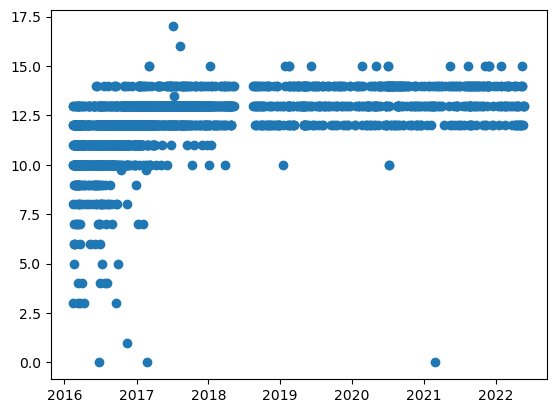

In [5]:
plot.scatter(dogRatesTweets_filt["created_at"],dogRatesTweets_filt["rating"])

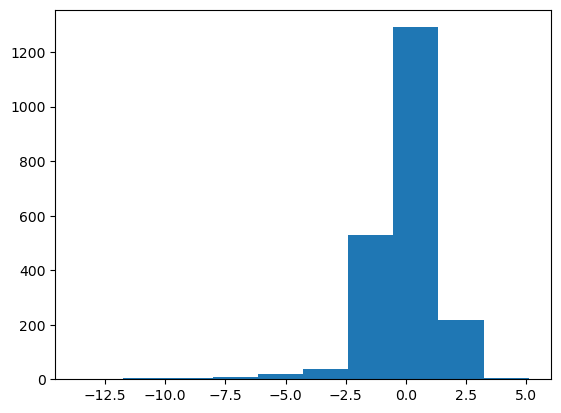

2.607038813966516e-127

In [15]:

dogRatesTweets_filt['timestamp'] = dogRatesTweets_filt['created_at'].apply(to_timestamp)
# dogRatesTweets_filt['timestamp'] = to_timestamp(dogRatesTweets_filt['created_at'])
fit1 = linregress(dogRatesTweets_filt["timestamp"], dogRatesTweets_filt["rating"])
pvalue = fit1.pvalue
fit1 =  dogRatesTweets_filt['timestamp']*fit1.slope + fit1.intercept
dogRatesTweets_filt['prediction'] = fit1
dogRatesTweets_filt["residual"] = dogRatesTweets_filt["rating"] - dogRatesTweets_filt["prediction"]
plot.hist(dogRatesTweets_filt["residual"])
plot.show()
del fit1
pvalue

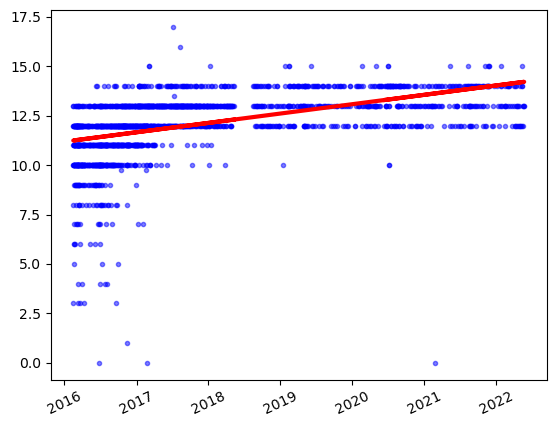

In [7]:
plot.xticks(rotation=25)
plot.plot(dogRatesTweets_filt["created_at"],dogRatesTweets_filt["rating"], 'b.', alpha=0.5)
plot.plot(dogRatesTweets_filt["created_at"], dogRatesTweets_filt['prediction'] ,'r-', linewidth=3)